# Spatial queries: Point in Polygon & Intersect

Finding out if a certain point is located inside or outside of an area, or finding out if a line intersects with another line or polygon are fundamental geospatial operations that are often used e.g. to select data based on location. Such spatial queries are one of the typical first steps of the workflow when doing spatial analysis. Performing a spatial join (will be introduced later) between two spatial datasets is one of the most typical applications where Point in Polygon (PIP) query is used. 

## How to check if point is inside a polygon?

Computationally, detecting if a point is inside a Polygon is most commonly done using a specific formula called [Ray Casting algorithm](https://en.wikipedia.org/wiki/Point_in_polygon#Ray_casting_algorithm). Luckily, we do not need to create such a function ourselves for conducting the Point in Polygon (PIP) query. Instead, we can take advantage of [Shapely's binary predicates](http://toblerity.org/shapely/manual.html#binary-predicates) that can evaluate the topolocical relationships between geographical objects, such as the PIP as we're interested here. 

There are basically two ways of conducting PIP in Shapely: 
  
  1. using a function called [.within()](http://toblerity.org/shapely/manual.html#object.within) that checks if a point is within a polygon
  2. using a function called [.contains()](http://toblerity.org/shapely/manual.html#object.contains) that checks if a polygon contains a point
  
Notice: even though we are talking here about **Point** in Polygon operation, it is also possible to check if a LineString or Polygon is inside another Polygon. 

 - Let's first create a Polygon using a list of coordinate-tuples and a couple of Point objects

In [22]:
from shapely.geometry import Point, Polygon

# Create Point objects
p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)


# Create a Polygon
coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coords)

# Let's check what we have
print(p1)
print(p2)
print(poly)

POINT (24.952242 60.1696017)
POINT (24.976567 60.16125)
POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


 - Let's check if those points are `within` the polygon

In [21]:
# Check if p1 is within the polygon using the within function
p1_within = p1.within(poly)

# Check if p2 is within the polygon
p2_within = p2.within(poly)

# Print the results
print("Is p1 within the polygon?: ", p1_within)
print("Is p2 within the polygon?: ", p2_within)

Is p1 within the polygon?:  True
Is p2 within the polygon?:  False


Okey, so we can see that the first point seems to be inside that polygon and the other one doesn't. 
  
  - In fact, the first point is close to the center of the polygon as we can see:

In [23]:
print(p1)
print(poly.centroid)

POINT (24.952242 60.1696017)
POINT (24.95224242849236 60.16960179038188)


 - It is also possible to do PIP other way around, i.e. to check if polygon contains a point:

In [27]:
# Does polygon contain point 1
print("Does polygon contain p1?: ", poly.contains(p1))

# What about the other point? 
print("Does polygon contain p2?: ", poly.contains(p2))

Does polygon contain p1?:  True
Does polygon contain p2?:  False


Thus, both ways has the same results. 

Which one should you use then? Well, it depends: 

 - if you have many points and just one polygon and you try to find out which one of them is inside the polygon:
   
    - you need to iterate over the points and check one at a time if it is **within()** the polygon specified
    
 - if you have many polygons and just one point and you want to find out which polygon contains the point
   
   - you need to iterate over the polygons until you find a polygon that **contains()** the point specified (assuming there are no overlapping polygons)

## Intersect

Another typical geospatial operation is to see if a geometry [intersect](http://toblerity.org/shapely/manual.html#object.intersects) or [touches](http://toblerity.org/shapely/manual.html#object.touches) another one. The difference between these two is that:

  -  if objects intersect, the boundary and interior of an object needs to intersect in any way with those of the other. 
  - If an object touches the other one, it is only necessary to have (at least) a single point of their boundaries in common but their interiors shoud NOT intersect.

Let's try these out.

 - Let's create two LineStrings

In [53]:
from shapely.geometry import LineString, MultiLineString

# Create two lines
line_a = LineString([(0, 0), (1, 1)])
line_b = LineString([(1, 1), (0, 2)])

 - Let's see if they intersect

In [37]:
line_a.intersects(line_b)

True

 - Do they also touch each other?

In [38]:
line_a.touches(line_b)

True

Indeed, they do and we can see this by plotting the features together

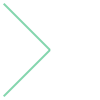

In [54]:
# Create a MultiLineString
multi_line = MultiLineString([line_a, line_b])
multi_line

Thus, the line_b continues from the same node ( (1,1) ) where line_a ends. 

 - However, if the lines overlap fully, they don't touch, as we can see:

In [57]:
# Check if line_a touches itself
print("Touches?: ", line_a.touches(line_a))

# However, it does intersect
print("Intersects?: ", line_a.intersects(line_a))

Touches?:  False
Intersects?:  True
